In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from cvxopt import matrix, solvers
from sklearn.datasets import make_classification
from sklearn.svm import SVC

# Load the data and combine datasets


In [2]:
df = pd.read_csv('archive_2/application_record.csv')
df.head(10)

df2=pd.read_csv('archive_2/credit_record.csv')
df2.drop(['ID'], axis=1, inplace=True)
df2_interpolated = df2.reindex(range(len(df))).interpolate(method='linear')
print(df2_interpolated.shape)  # Now df2 matches df1 in terms of rows




(438557, 2)


/var/folders/k3/h2kry1d546xfj1d042l_vgt00000gn/T/ipykernel_2720/1489548345.py:6: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df2_interpolated = df2.reindex(range(len(df))).interpolate(method='linear')


In [4]:
df_merged=pd.concat([df,df2_interpolated],axis=1)
df_merged.head(100)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,X
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-2,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-3,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5008905,F,N,Y,0,297000.0,Commercial associate,Secondary / secondary special,Single / not married,Rented apartment,-15519,-3234,1,0,0,0,Laborers,1.0,-35,X
96,5008906,F,N,Y,0,297000.0,Commercial associate,Secondary / secondary special,Single / not married,Rented apartment,-15519,-3234,1,0,0,0,Laborers,1.0,-36,X
97,5008907,F,N,Y,0,297000.0,Commercial associate,Secondary / secondary special,Single / not married,Rented apartment,-15519,-3234,1,0,0,0,Laborers,1.0,-37,X
98,5008908,F,N,Y,0,297000.0,Commercial associate,Secondary / secondary special,Single / not married,Rented apartment,-15519,-3234,1,0,0,0,Laborers,1.0,-38,X


# Filter the data

In [5]:
df_merged.isnull().sum()


ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
MONTHS_BALANCE              0
STATUS                      0
dtype: int64

In [3]:
##Fill nulls with "Unknown"
df_merged.fillna('Unknown', inplace=True)

NameError: name 'df_merged' is not defined

In [7]:
df_merged.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Unknown,2.0,0,X
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Unknown,2.0,-1,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-2,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-3,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,C
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-1,C
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-2,C
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,Unknown,1.0,-3,C
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,Unknown,1.0,-4,C
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,Unknown,1.0,-5,C


In [73]:
df_merged.shape

(438557, 20)

# Encode categorical values to numerical values -> Label encoding

In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# List of columns to encode (those that are categorical)
categorical_columns = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 
                       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 
                       'OCCUPATION_TYPE']

for col in categorical_columns:
    df_merged[col] = label_encoder.fit_transform(df[col].astype(str))


##If status is X or C, then 0, else 1
df_merged['STATUS'] = df_merged['STATUS'].apply(lambda x: 0 if x in ['X', 'C'] else 1)

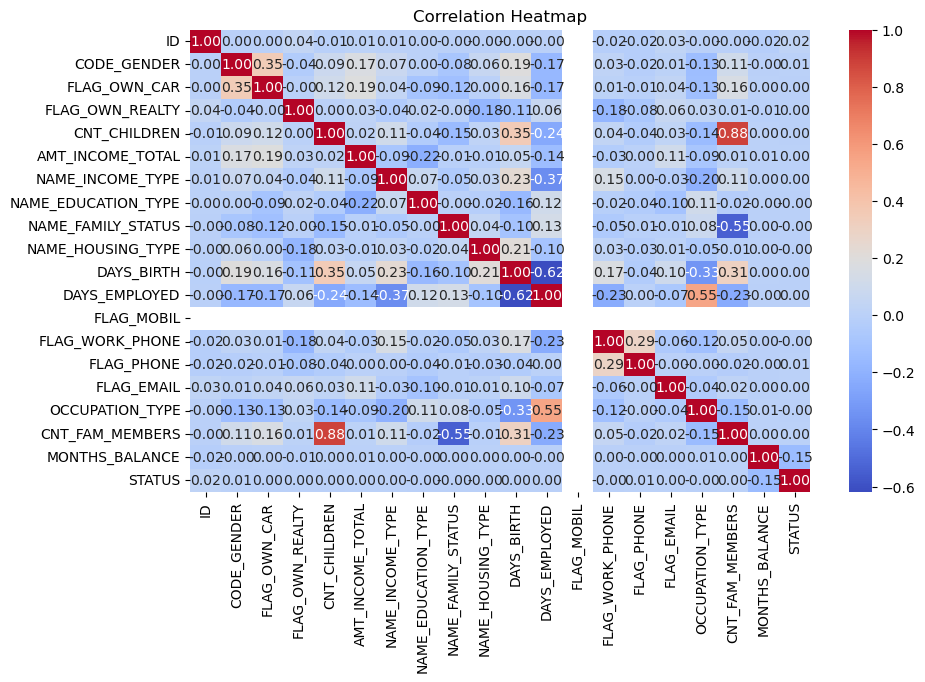

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_merged.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Feature engineering

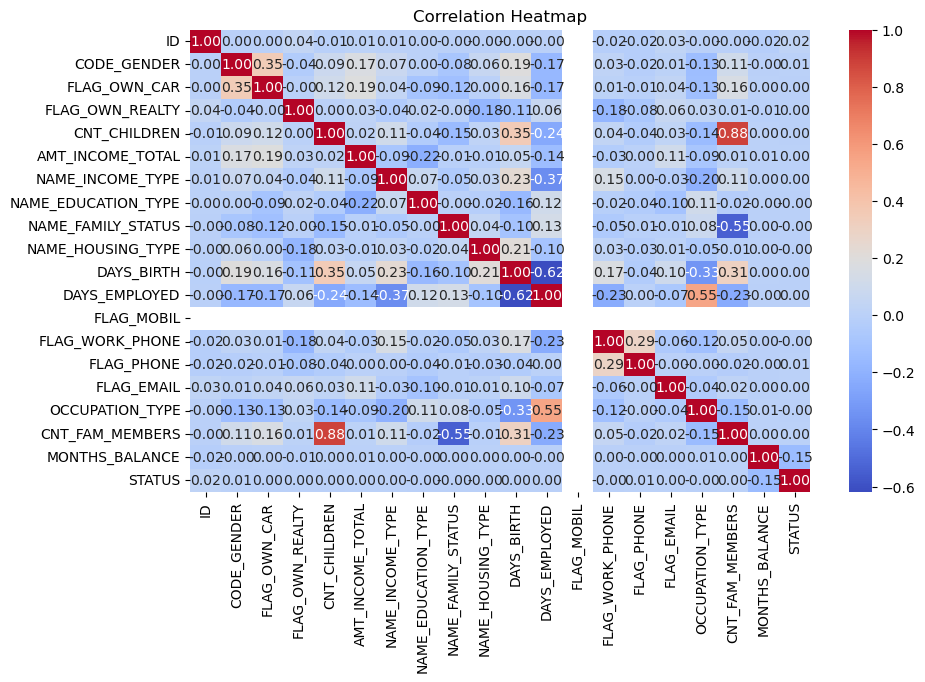

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_merged.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [11]:
df_merged['AGE'] = -df_merged['DAYS_BIRTH'] // 365
df_merged['DAYS_EMPLOYED'] = df_merged['DAYS_EMPLOYED'].abs()


In [4]:

df_merged['INCOME_PER_MEMBER'] = df_merged['AMT_INCOME_TOTAL'] / (df_merged['CNT_FAM_MEMBERS'] + 1)

df_merged['INCOME_MONTHLY'] = df_merged['AMT_INCOME_TOTAL'] / 12 

df_merged['ABS_MONTHS_BALANCE'] = df_merged['MONTHS_BALANCE'].abs()

df_merged.drop(['MONTHS_BALANCE'],axis=1,inplace=True)



df_merged.head(10)

NameError: name 'df_merged' is not defined

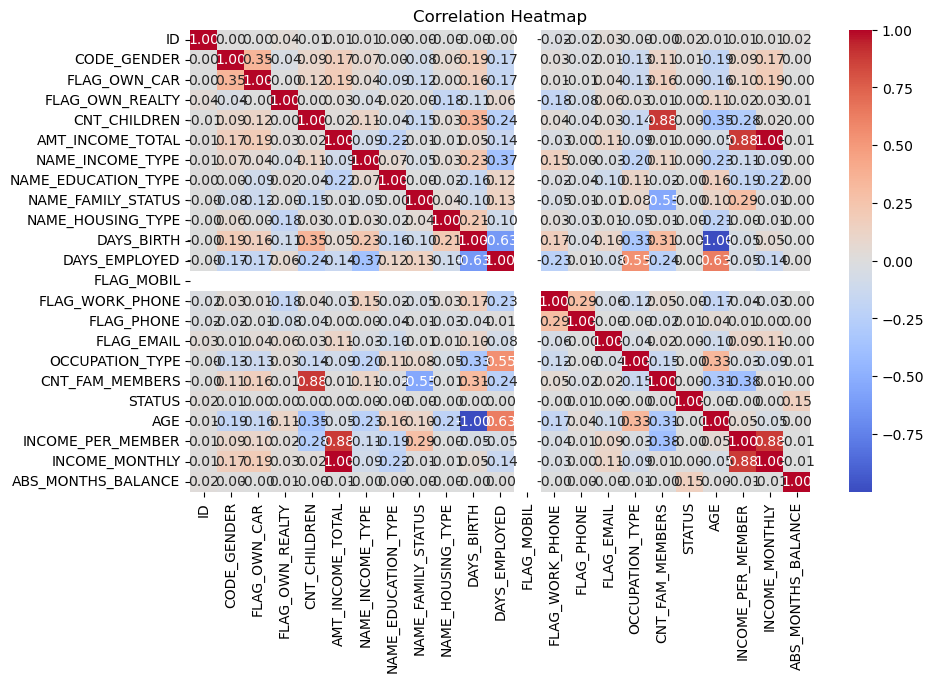

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_merged.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [24]:
X=df_merged.drop(['STATUS'],axis=1)
y=df_merged['STATUS']
y = np.where(y == 0, -1, 1)

print(f"Class Distribution: {np.bincount(y + 1)}")  # Convert -1,1 back to 0,1 for display

Class Distribution: [273504      0 165053]


In [25]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Perform feature selection
selector = SelectKBest(score_func=mutual_info_classif, k=10)  # Select top 10 features
X_selected = selector.fit_transform(X, y)

# Get the scores for each feature
feature_scores = selector.scores_
print(f"Feature Scores: {feature_scores}")

# Selected feature indices
selected_features = selector.get_support(indices=True)
print(f"Selected Features: {selected_features}")

Feature Scores: [0.41935553 0.01694341 0.0223874  0.04935752 0.0036474  0.0064489
 0.03095897 0.03150618 0.0281111  0.0463287  0.07058236 0.04778994
 0.05706555 0.0078539  0.0125849  0.00187754 0.0098115  0.02330955
 0.0013518  0.00550177 0.00549822 0.01383461]
Selected Features: [ 0  3  6  7  8  9 10 11 12 17]


In [26]:
## names of the features
for i in selected_features:
    print(X.columns[i])

ID
FLAG_OWN_REALTY
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
DAYS_BIRTH
DAYS_EMPLOYED
FLAG_MOBIL
CNT_FAM_MEMBERS


#### My best feature is the ID ,that s not good, let s go back to the originat df


In [27]:
df.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0


In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [10]:
categorical_columns = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 
                       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 
                       'OCCUPATION_TYPE']

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col].astype(str))


In [11]:
df['AGE'] = -df['DAYS_BIRTH'] // 365
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].abs()

In [12]:

df['INCOME_PER_MEMBER'] = df['AMT_INCOME_TOTAL'] / (df['CNT_FAM_MEMBERS'] + 1)

df['INCOME_MONTHLY'] = df['AMT_INCOME_TOTAL'] / 12 

## Risk factors that influence loan:
    * Employment Status and Income Stability
    * Borrower’s Financial History and Behavior (let s consider - flag on own reality, car and phone)

In [14]:

days_employed_99th = df['DAYS_EMPLOYED'].quantile(0.99)
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].clip(upper=days_employed_99th)


income_monthly_threshold = df['INCOME_MONTHLY'].mean() + 0.5 * df['INCOME_MONTHLY'].std()
income_per_member_threshold = df['INCOME_PER_MEMBER'].quantile(0.75)  # 75th percentile
days_employed_threshold = df['DAYS_EMPLOYED'].quantile(0.25)  # 25th percentile


conditions = (
    (df['INCOME_MONTHLY'] > income_monthly_threshold) &
    (df['INCOME_PER_MEMBER'] > income_per_member_threshold) &
    (df['DAYS_EMPLOYED'] > days_employed_threshold) &
    (df['FLAG_OWN_REALTY'] == 1) &
    (df['FLAG_PHONE'] == 1) &
    (df['FLAG_OWN_CAR']==1) 
)


df['loan_approved'] = conditions
df['loan_approved'] = df['loan_approved'].replace({True: 'Yes', False: 'No'})

# Print threshold values for verification
print(f"Monthly Income Threshold: {income_monthly_threshold}")
print(f"Income Per Member Threshold: {income_per_member_threshold}")
print(f"Days Employed Threshold: {days_employed_threshold}")


Monthly Income Threshold: 20213.9760452168
Income Per Member Threshold: 76500.0
Days Employed Threshold: 1093.0


In [15]:
#Let s count loan approved vs loan rejected

df['loan_approved'].value_counts()

loan_approved
No     433211
Yes      5346
Name: count, dtype: int64

I think we need to fix tresholds

In [16]:
df.drop(['loan_approved'],axis=1,inplace=True)

In [46]:
df.head(100)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,INCOME_PER_MEMBER,INCOME_MONTHLY,loan_approved
0,5008804,1,1,1,0,427500.0,4,1,0,4,...,1,1,0,0,18,2.0,32,142500.0,35625.0,No
1,5008805,1,1,1,0,427500.0,4,1,0,4,...,1,1,0,0,18,2.0,32,142500.0,35625.0,No
2,5008806,1,1,1,0,112500.0,4,4,1,1,...,1,0,0,0,16,2.0,58,37500.0,9375.0,No
3,5008808,0,0,1,0,270000.0,0,4,3,1,...,1,0,1,1,14,1.0,52,135000.0,22500.0,No
4,5008809,0,0,1,0,270000.0,0,4,3,1,...,1,0,1,1,14,1.0,52,135000.0,22500.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5008905,0,0,1,0,297000.0,0,4,3,4,...,1,0,0,0,8,1.0,42,148500.0,24750.0,No
96,5008906,0,0,1,0,297000.0,0,4,3,4,...,1,0,0,0,8,1.0,42,148500.0,24750.0,No
97,5008907,0,0,1,0,297000.0,0,4,3,4,...,1,0,0,0,8,1.0,42,148500.0,24750.0,No
98,5008908,0,0,1,0,297000.0,0,4,3,4,...,1,0,0,0,8,1.0,42,148500.0,24750.0,No


In [17]:
income_monthly_threshold = df['INCOME_MONTHLY'].quantile(0.40) 
income_per_member_threshold = df['INCOME_PER_MEMBER'].quantile(0.40)  
days_employed_threshold = df['DAYS_EMPLOYED'].quantile(0.20) 


conditions = (
    (df['INCOME_MONTHLY'] > income_monthly_threshold) &
    (df['INCOME_PER_MEMBER'] > income_per_member_threshold) &
    (df['DAYS_EMPLOYED'] > days_employed_threshold)
)

df['loan_approved'] = conditions
df['loan_approved'] = df['loan_approved'].replace({True: 1, False: 0})

/var/folders/k3/h2kry1d546xfj1d042l_vgt00000gn/T/ipykernel_2720/3346302661.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['loan_approved'] = df['loan_approved'].replace({True: 1, False: 0})


In [18]:
df['loan_approved'].value_counts() 

loan_approved
0    256139
1    182418
Name: count, dtype: int64

#### This looks better

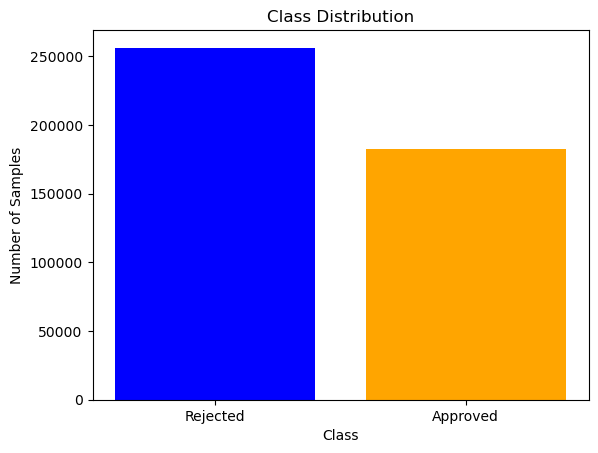

In [19]:
labels = ['Rejected', 'Approved']
counts = [256139, 182418]

plt.bar(labels, counts, color=['blue', 'orange'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.show()

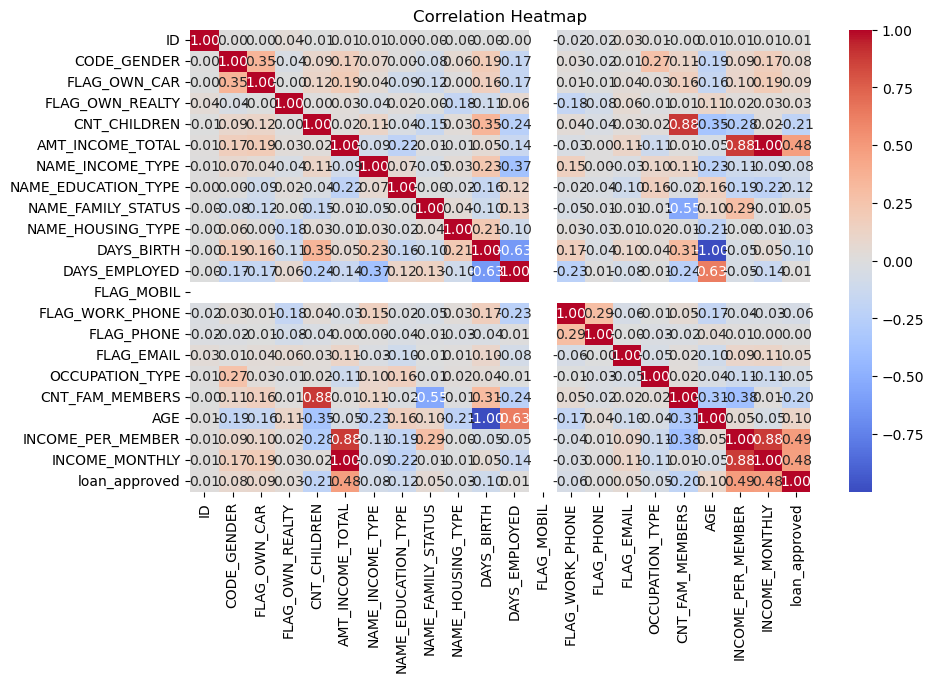

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [22]:
X=df[['INCOME_PER_MEMBER','INCOME_MONTHLY']]
y=df['loan_approved']

### 1ST Try : Hard Margin SVM


In [24]:
def compute_kernel_matrix(x, y, kwargs):

    kernel_type = kwargs['kernel_type']

    result = None

    ######## YOUR CODE HERE ########

    #print(x.shape)
    #print(y.shape)

    if kernel_type == 'linear':
        #print(x.shape)
        #print(y.shape)
        result = x @ y.T # dot product between x and x's transpose - to create the kernel matrix

    if kernel_type == 'polynomial':
        c = kwargs['c']
        degree = kwargs['degree']
        result = (x @ y.T + c) ** degree

    if kernel_type == 'gaussian':
        gamma = kwargs['gamma']
        sq_dists = np.sum(x**2, axis=1).reshape(-1, 1) + np.sum(y**2, axis=1) - 2 * np.dot(x, y.T)
        result = np.exp(-gamma * sq_dists)
    ################################

    return result

In [28]:
def find_alpha_soft(X, y, K, C):

    n_samples, n_features = X.shape
    P_numpy, q_numpy, G_numpy, h_numpy, A_numpy, b_numpy = None, None, None, None, None, None

    # Convert inputs to cvxopt format
    ######### YOUR CODE HERE #########

    y = y.reshape(-1,1) #shape it as a vector of (n_samples,1)

    yyt = y @ y.T #compute yi*yj

    P_numpy = yyt * K #matrix multiplication between each line and each column for y, them multiplied by matrix K
    q_numpy = -np.ones(n_samples)
    G_numpy = np.vstack((-np.eye(n_samples), np.eye(n_samples)))
    h_numpy = np.hstack((np.zeros(n_samples), np.ones(n_samples) * C)) #not convinced about this
    A_numpy = y.reshape(1,-1)
    b_numpy = np.zeros(1)

    ##################################

    # Convert inputs to cvxopt format
    P = matrix(P_numpy, tc='d')
    q = matrix(q_numpy, tc='d')
    G = matrix(G_numpy, tc='d')
    h = matrix(h_numpy, tc='d')
    A = matrix(A_numpy, tc='d')
    b = matrix(b_numpy, tc='d')

    # Solve the QP problem to find Lagrange multipliers alpha
    solution = solvers.qp(P, q, G, h, A, b)
    alpha = np.ravel(solution['x'])

    return alpha

In [30]:
import numpy as np
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt

class SoftMarginSVM:
    def __init__(self, kwargs=None):
        self.kwargs = kwargs
        self.C = kwargs['C']
        self.alpha = None
        self.support_vectors = None
        self.w = None
        self.b = None

    def kernel_function(self, x, y):
        return compute_kernel_matrix(x, y, self.kwargs)

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Compute the Kernel matrix
        K = self.kernel_function(X, X)

        self.alpha = find_alpha_soft(X, y, K, self.C)

        # Select support vectors
        support_vector_indices = (self.alpha > 1e-8) & (self.alpha < self.kwargs.get('C', np.inf))
        self.alpha = self.alpha[support_vector_indices]
        self.support_vectors = X[support_vector_indices]
        self.support_vector_labels = y[support_vector_indices]

        # Compute the bias term b
        ######### YOUR CODE HERE #########

        decision_function_at_support = np.sum(
            self.alpha * self.support_vector_labels *
            self.kernel_function(self.support_vectors, self.support_vectors), axis=1
        )
        self.b = np.mean(self.support_vector_labels - decision_function_at_support)

        ##################################

    def predict(self, X):

        pred = None

        ######### YOUR CODE HERE #########

        K_matr = self.kernel_function(X, self.support_vectors)

        decision_function = K_matr @ (self.alpha * self.support_vector_labels) + self.b

        pred = np.sign(decision_function)

        ##################################

        return pred

    def plot_decision_boundary(self, X, y):
        plt.figure(figsize=(10, 6))
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', marker='o', s=30, edgecolors='k', label='Data Points')
        plt.scatter(self.support_vectors[:, 0], self.support_vectors[:, 1], s=100, linewidth=1, facecolors='none',
                    edgecolors='k', label='Support Vectors')

        # Plot decision boundary
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
        grid = np.c_[xx.ravel(), yy.ravel()]
        Z = self.predict(grid).reshape(xx.shape)

        plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.legend()
        plt.show()


In [38]:
X=df.drop(['ID','loan_approved'],axis=1)
y=df['loan_approved']

In [31]:
def handle_nan(X):
    return np.nan_to_num(X)

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def evaluate_model(y_true, y_pred, dataset_name=""):
    print(f"Results for {dataset_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision: {precision_score(y_true, y_pred):.2f}")
    print(f"Recall: {recall_score(y_true, y_pred):.2f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.2f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))




     pcost       dcost       gap    pres   dres
 0: -5.6700e+02 -1.5670e+03  4e+03  1e+00  4e-16
 1: -4.7164e+02 -8.8245e+02  4e+02  1e-02  5e-16
 2: -5.5688e+02 -5.7380e+02  2e+01  6e-04  3e-16
 3: -5.6690e+02 -5.6707e+02  2e-01  6e-06  2e-16
 4: -5.6700e+02 -5.6700e+02  2e-03  6e-08  4e-16
 5: -5.6700e+02 -5.6700e+02  2e-05  6e-10  3e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -6.0000e+02 -1.6000e+03  4e+03  1e+00  4e-16
 1: -4.9904e+02 -9.1878e+02  4e+02  1e-02  3e-16
 2: -5.8928e+02 -6.0656e+02  2e+01  6e-04  3e-16
 3: -5.9989e+02 -6.0007e+02  2e-01  6e-06  3e-16
 4: -6.0000e+02 -6.0000e+02  2e-03  6e-08  3e-16
 5: -6.0000e+02 -6.0000e+02  2e-05  6e-10  3e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -5.8600e+02 -1.5860e+03  4e+03  1e+00  4e-16
 1: -4.8742e+02 -9.0337e+02  4e+02  1e-02  4e-16
 2: -5.7554e+02 -5.9266e+02  2e+01  6e-04  3e-16
 3: -5.8590e+02 -5.8607e+02  2e-01  6e-06  3e-16
 4: -5.8600e+02 -5.8600e

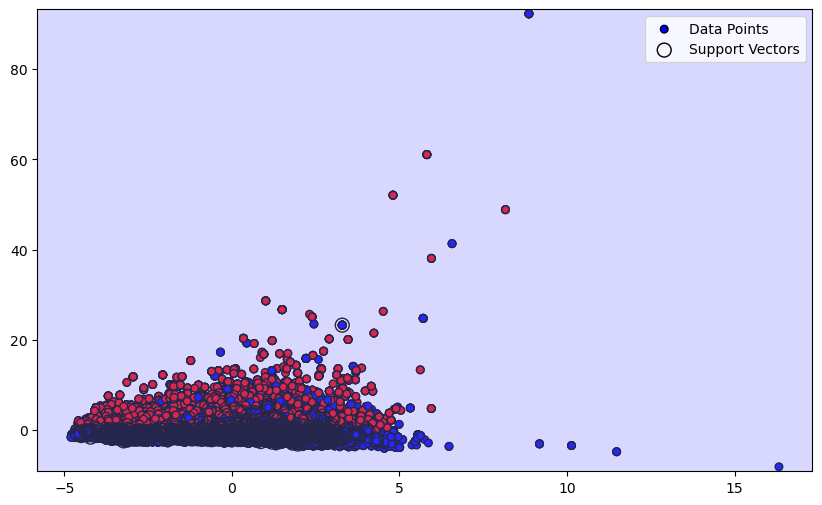

Gaussian SVM results on testing set:


ValueError: 'c' argument has 87712 elements, which is inconsistent with 'x' and 'y' with size 350845.

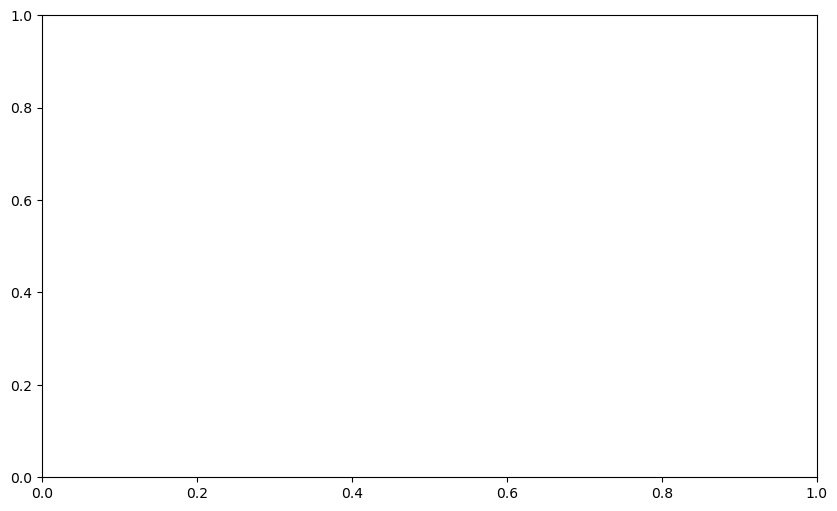

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd  

dict_gaussian = {'kernel_type': 'gaussian', 'gamma': 1,'C':1}
svm_gaussian = SoftMarginSVM(dict_gaussian)

batch_size = 1000

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_pca = handle_nan(X_train_scaled)
X_test_pca = handle_nan(X_test_scaled)

X_test_pca= np.log1p(np.maximum(X_train_pca, 0))
X_test_pca= np.log1p(np.maximum(X_test_pca, 0))

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_pca)
X_test_pca = pca.transform(X_test_pca)


def process_fit_in_batches(model, X, y, batch_size=1000):
    num_batches = (X.shape[0] + batch_size - 1) // batch_size
    if isinstance(y, pd.Series): y = y.to_numpy()
    for i in range(num_batches):
        start = i * batch_size
        end = min((i + 1) * batch_size, X.shape[0])
        X_batch = X[start:end]
        y_batch = y[start:end]  
        model.fit(X_batch, y_batch)

def process_predict_in_batches(model, X, batch_size=1000):
    num_batches = (X.shape[0] + batch_size - 1) // batch_size
    predictions = []
    for i in range(num_batches):
        start = i * batch_size
        end = min((i + 1) * batch_size, X.shape[0])
        X_batch = X[start:end]
        batch_predictions = model.predict(X_batch)
        predictions.append(batch_predictions)
    return np.concatenate(predictions)  


process_fit_in_batches(svm_gaussian, X_train_pca, y_train, batch_size=batch_size)


print("Gaussian SVM results on training set:")
svm_gaussian.plot_decision_boundary(X_train_pca, y_train)


y_train_pred = process_predict_in_batches(svm_gaussian, X_train_pca, batch_size=batch_size)


print("Gaussian SVM results on testing set:")
svm_gaussian.plot_decision_boundary(X_test_pca, y_test)


y_test_pred = process_predict_in_batches(svm_gaussian, X_test_pca, batch_size=batch_size)
